In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/kaggle/input/hardware-monitor-data/hardware_monitor_data.csv'
df = pd.read_csv(file_path)

print("Dataset Info:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21356379 entries, 0 to 21356378
Data columns (total 7 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   2024-11-30 16:03:16.103380  object 
 1   Unnamed: 1                  float64
 2   19.5                        float64
 3   0.0                         float64
 4   57.5                        float64
 5   38                          float64
 6   Unnamed: 6                  float64
dtypes: float64(6), object(1)
memory usage: 1.1+ GB
None

First few rows of the dataset:
   2024-11-30 16:03:16.103380  Unnamed: 1  19.5  0.0  57.5    38  Unnamed: 6
0  2024-11-30 16:03:16.103380         NaN  19.5  0.0  57.5  38.0         NaN
1  2024-11-30 16:03:17.617579         NaN  17.8  0.0  57.5  38.0         NaN
2  2024-11-30 16:03:16.103380         NaN  19.5  0.0  57.5  38.0         NaN
3  2024-11-30 16:03:17.617579         NaN  17.8  0.0  57.5  38.0         NaN
4  2024-11-30 16:03:17.838076

In [2]:
df_cleaned = df.iloc[:, 1:]  

columns = [
    "cpu_temperature", 
    "cpu_usage",       
    "cpu_load",        
    "memory_usage",    
    "battery_level",   
    "cpu_power"        
]
df_cleaned.columns = columns

df_cleaned.fillna(df_cleaned.mean(), inplace=True)

print("Cleaned Dataset:")
print(df_cleaned.head())


Cleaned Dataset:
   cpu_temperature  cpu_usage  cpu_load  memory_usage  battery_level  \
0        97.091595       19.5       0.0          57.5           38.0   
1        97.091595       17.8       0.0          57.5           38.0   
2        97.091595       19.5       0.0          57.5           38.0   
3        97.091595       17.8       0.0          57.5           38.0   
4        97.091595       18.4       0.0          57.5           38.0   

   cpu_power  
0  75.498116  
1  75.498116  
2  75.498116  
3  75.498116  
4  75.498116  


In [3]:
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df_cleaned['anomaly'] = model.fit_predict(df_cleaned)

df_cleaned['anomaly'] = df_cleaned['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print("\nAnomaly Counts:")
print(df_cleaned['anomaly'].value_counts())

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Anomaly Counts:
anomaly
Normal     21143566
Anomaly      212813
Name: count, dtype: int64


In [4]:
mean_variance = df_cleaned.describe().loc[['mean', 'std']].T
mean_variance.rename(columns={'std': 'variance'}, inplace=True)
mean_variance['variance'] = mean_variance['variance'] ** 2  

print("\nMean and Variance of the Data:")
print(mean_variance)

stats_output_path = 'data_statistics.csv'
mean_variance.to_csv(stats_output_path)
print(f"\nMean and variance statistics saved to {stats_output_path}")


Mean and Variance of the Data:
                      mean    variance
cpu_temperature  97.091595    1.677461
cpu_usage        20.549535  783.109967
cpu_load          0.250499    0.062097
memory_usage     61.550653  151.966976
battery_level    33.787361  102.119253
cpu_power        75.498116   21.032140

Mean and variance statistics saved to data_statistics.csv


/tmp/ipykernel_30/2049129947.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


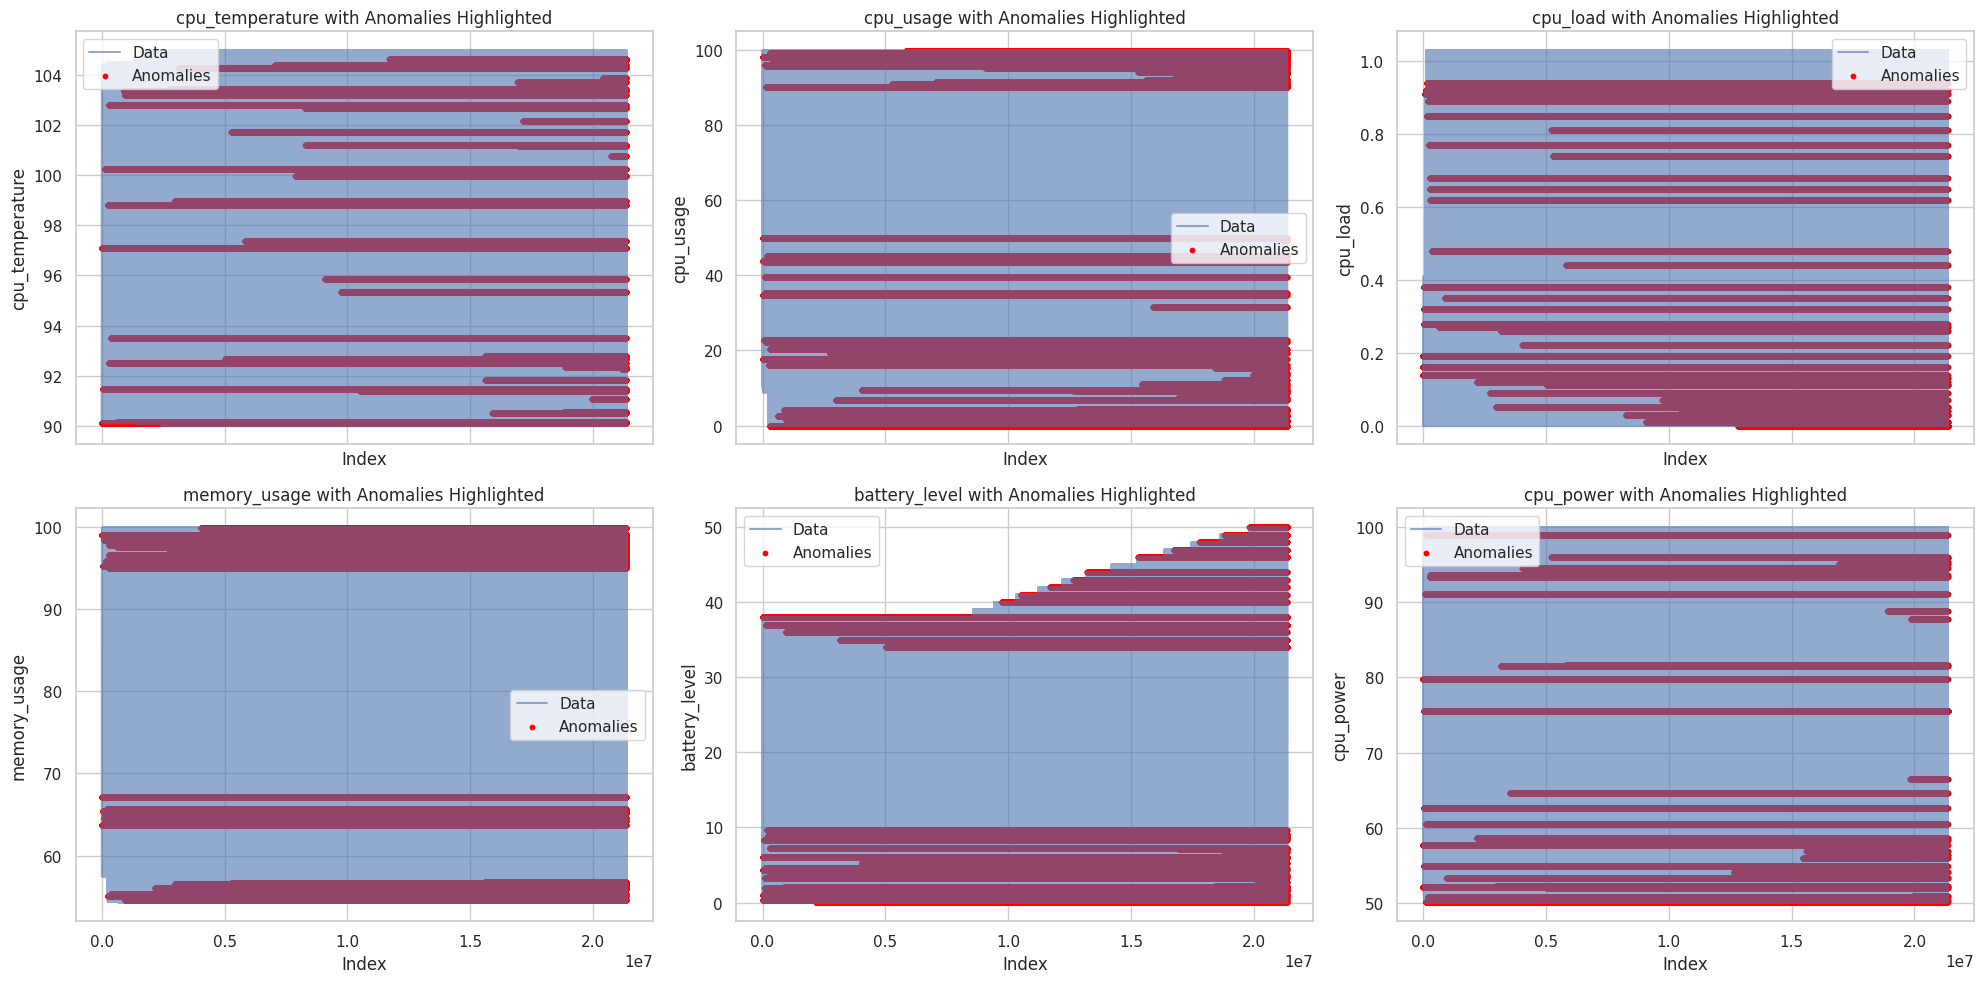

In [6]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True)

columns = ["cpu_temperature", "cpu_usage", "cpu_load", "memory_usage", "battery_level", "cpu_power"]

for i, col in enumerate(columns):
    ax = axes[i // 3, i % 3]  
    ax.plot(df_cleaned.index, df_cleaned[col], label="Data", alpha=0.6)
    
    anomalies = df_cleaned[df_cleaned['anomaly'] == 'Anomaly']
    ax.scatter(anomalies.index, anomalies[col], color='red', label="Anomalies", s=10)
    ax.set_title(f"{col} with Anomalies Highlighted")
    ax.set_xlabel("Index")
    ax.set_ylabel(col)
    ax.legend()

plt.tight_layout()
plt.show()


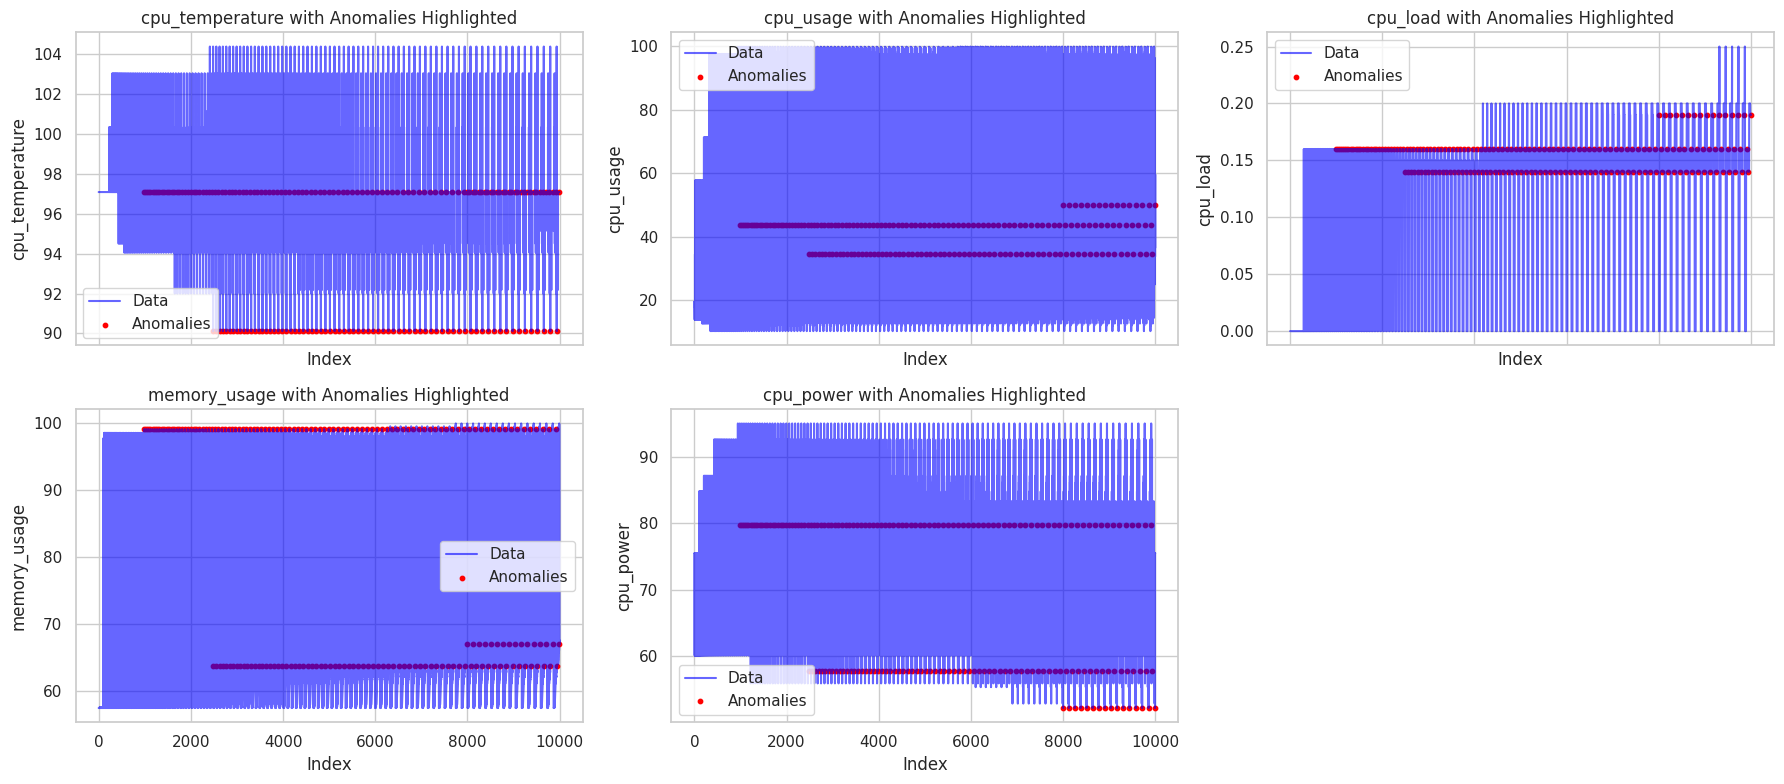

In [7]:
first_10000_df = df_cleaned.iloc[:10000]

columns = ["cpu_temperature", "cpu_usage", "cpu_load", "memory_usage", "cpu_power"]

n_plots = len(columns)
n_rows = 2  
n_cols = 3  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8), sharex=True)

axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]  
    
    ax.plot(first_10000_df.index, first_10000_df[col], label="Data", color='blue', alpha=0.6)
    
    anomalies = first_10000_df[first_10000_df['anomaly'] == 'Anomaly']
    ax.scatter(anomalies.index, anomalies[col], color='red', label="Anomalies", s=10)
    
    # Set titles and labels
    ax.set_title(f"{col} with Anomalies Highlighted")
    ax.set_xlabel("Index")
    ax.set_ylabel(col)
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


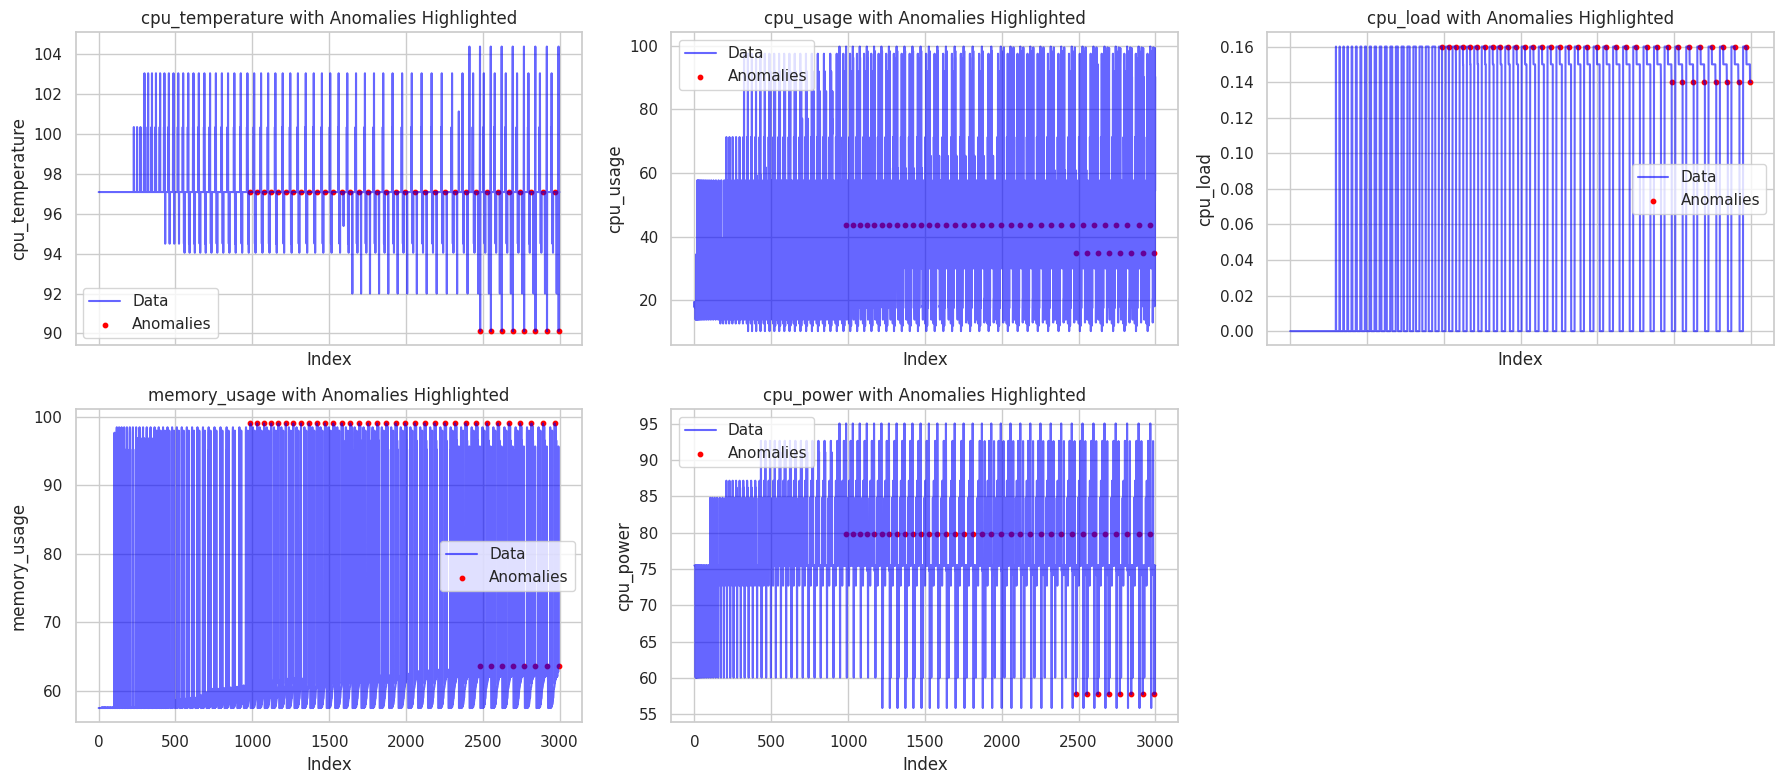

In [8]:
subset_df = df_cleaned.iloc[:3000]

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8), sharex=True)

axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]
    ax.plot(subset_df.index, subset_df[col], label="Data", color='blue', alpha=0.6)    
    anomalies = subset_df[subset_df['anomaly'] == 'Anomaly']
    ax.scatter(anomalies.index, anomalies[col], color='red', label="Anomalies", s=10)    
    ax.set_title(f"{col} with Anomalies Highlighted")
    ax.set_xlabel("Index")
    ax.set_ylabel(col)
    ax.legend()
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


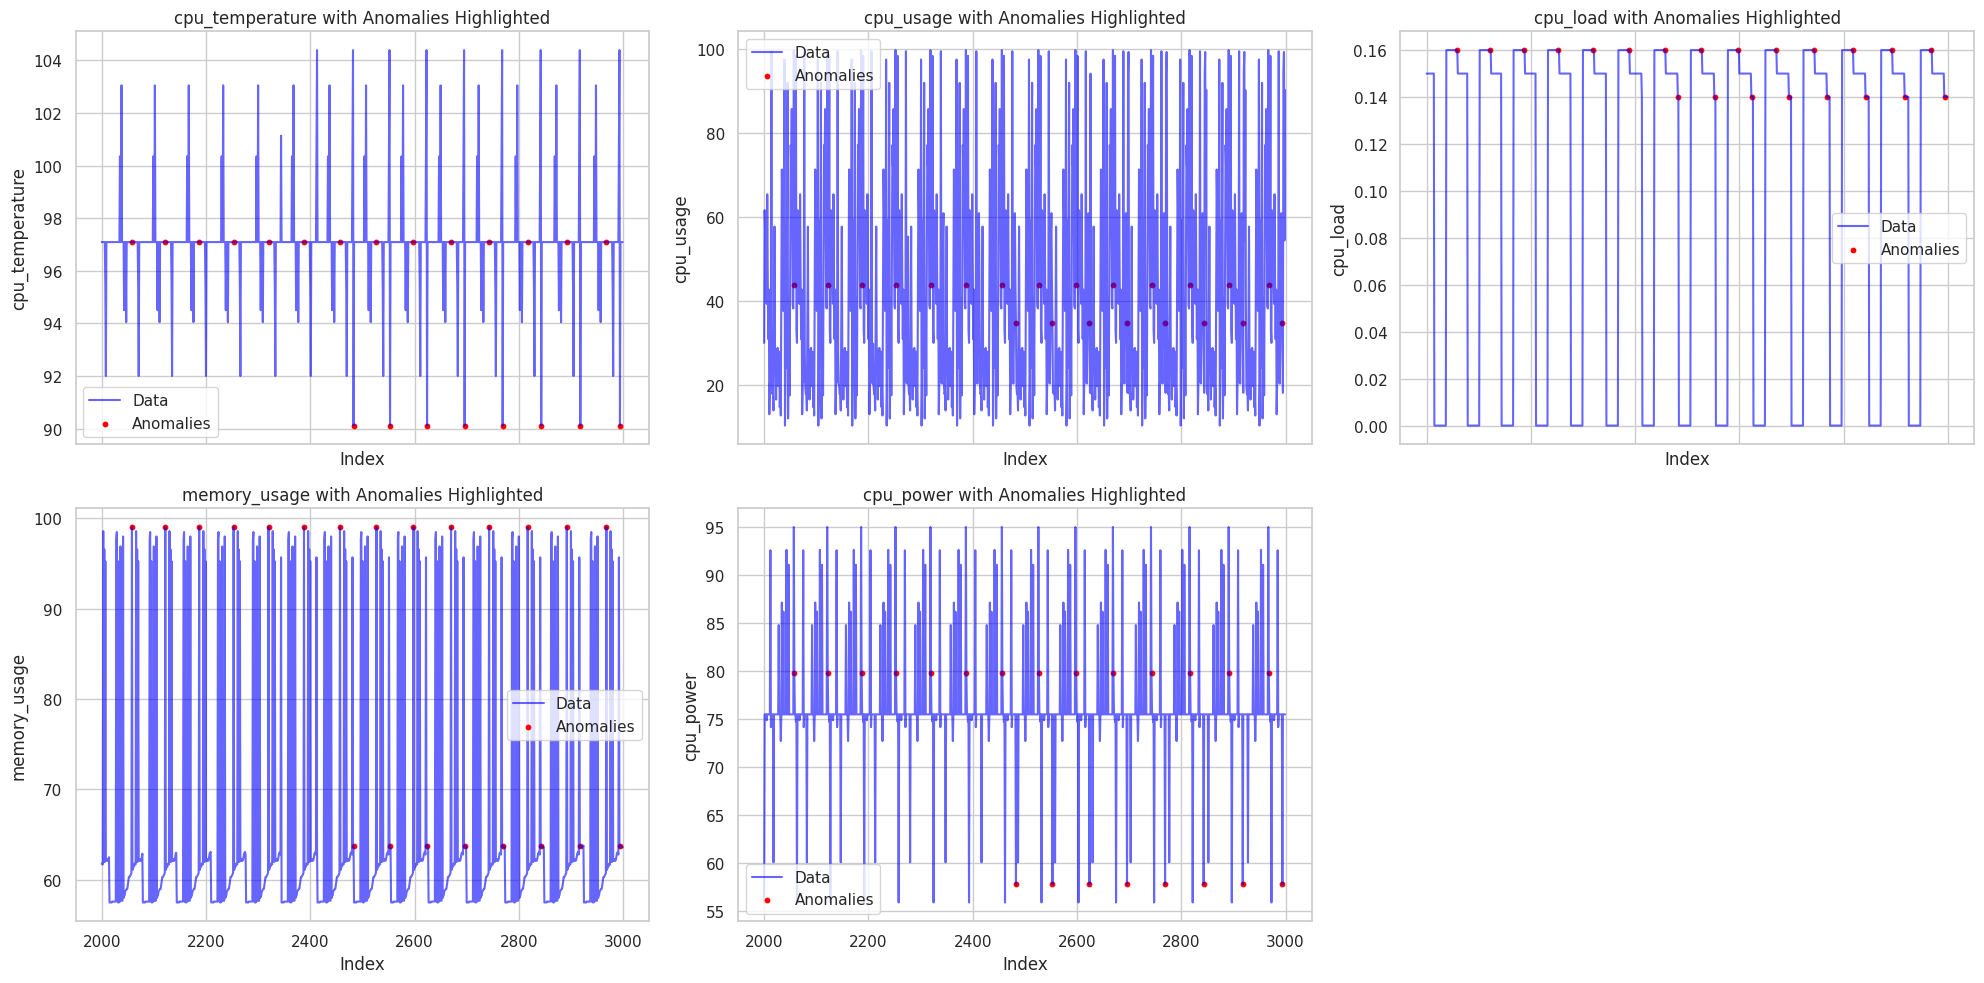

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_df = df_cleaned.iloc[2000:3000]

sns.set(style="whitegrid")

columns = ["cpu_temperature", "cpu_usage", "cpu_load", "memory_usage", "cpu_power"]

n_plots = len(columns)
n_rows = 2  # 2 rows
n_cols = 3  # 3 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=True)

axes = axes.flatten()
for i, col in enumerate(columns):
    ax = axes[i]
    ax.plot(subset_df.index, subset_df[col], label="Data", color='blue', alpha=0.6)
    anomalies = subset_df[subset_df['anomaly'] == 'Anomaly']
    ax.scatter(anomalies.index, anomalies[col], color='red', label="Anomalies", s=10)
    ax.set_title(f"{col} with Anomalies Highlighted")
    ax.set_xlabel("Index")
    ax.set_ylabel(col)
    ax.legend()

    ax.set_xlim(1950, 3050)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Show the plot
plt.show()
